### Homework 3 - Felipe Alves (N14713445)

Program that obtains the daily percentage change in the share price of each of these companies by sending a query to the the Yahoo finance API and produces a scatter plot of absolute value of percentage change against log market capitalization

To do it I created a Class called Firm to store firms' information and to get the price.

PS: I adapted the code for both datasets. Choose the right one at cell below

In [5]:
# data = open('company_list_old.csv','r'); ind_data = 'o'
data = open('company_list_corrected.csv','r'); ind_data = 'c'



In [2]:
import re
import requests
import matplotlib.pyplot as plt

class Firm(object):
    r"""
    Creates an instance of a firm that holds its characteristics and 
    has get_price method
    """
    def __init__(self, symbol, name, mktcap ):
        self.symbol, self.name, self.mktcap = symbol, name, mktcap
        
        # Indicator for LowerCap Stock < 2B
        self.bc = 1 if mktcap > 2000 else 0

    def get_price(self):
        r"""
        Ask for % price change in yahoo
        """

        info = {'s': self.symbol, 'f': 'p2'}
        
        r = requests.get('http://finance.yahoo.com/d/quotes.csv', info)
        match = re.search(r'(\d+\.?\d*)%?',r.text) 
        self.ppc = float(match.group(1)) if match else []

In [10]:
# check the class definition and methods
help(Firm)

In [6]:
# == Choose which dataset to Open == #
next(data)
firms = []
i = 0
print_firms = True

for line in data:

    #= extract info =#
    ## USING Old dataset
    if ind_data=='o':        
        line = line.replace('"','')
        symbol, name, mk_cap = line.split(',')
    ## USING corrected dataset
    elif ind_data=='c':
        symbol, name, mk_cap = re.split(r',(?=(?:[^"]*"[^"]*")*[^"]*$)',line)
        symbol = symbol.replace('"','')
        name = name.replace('"','')
    
    match = re.search(r'\$?(\d+\.?\d*)([MB]?)',mk_cap)
    
    if match:
        if match.group(2)=='': #
            mktcap = float(match.group(1))
        elif match.group(2)=='M':                   # if there is million in the END
            mktcap = float(match.group(1))
        elif match.group(2)=='B':                   # if there is Billion in the END 
            mktcap = float(match.group(1))*1000
    else:
        mktcap = -1.0

    print('{0:5s} {1:40s} {2:10.2f}'.format(symbol,name,mktcap)) if print_firms==True else None
    f = Firm(symbol,name,mktcap)
    
    f.get_price()
    firms.append(f)
    i+=1
    if i==100:
        break
        
print('END')        

TFSC  1347 Capital Corp.                            18.13
TFSCR 1347 Capital Corp.                            -1.00
TFSCU 1347 Capital Corp.                            -1.00
TFSCW 1347 Capital Corp.                            -1.00
PIH   1347 Property Insurance Holding               38.64
FLWS  1-800 FLOWERS.COM, Inc.                      519.58
FCTY  1st Century Bancshares, Inc                   79.02
FCCY  1st Constitution Bancorp (NJ)                 92.93
SRCE  1st Source Corporation                       792.96
VNET  21Vianet Group, Inc.                        1660.00
TWOU  2U, Inc.                                     858.65
JOBS  51job, Inc.                                 1670.00
SIXD  6D GLOBAL TECHNOLOGI                         226.92
CAFD  8point3 Energy Partners LP                   316.31
EGHT  8x8 Inc                                      979.21
AVHI  A V Homes, Inc.                              206.91
SHLM  A. Schulman, Inc.                            716.82
AAON  AAON, In

In [7]:
# [(f.mktcap,f.ppc) for f in firms]

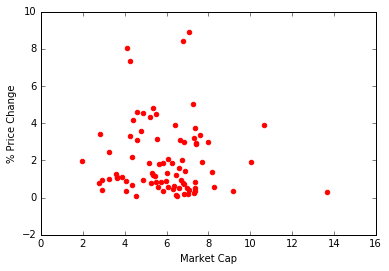

84

In [7]:
%matplotlib inline
from numpy import log # just to draw a better graph

# == extract the indices without any missing information == #
ind = []
i = 0
for f in firms:
    ind.append(i) if f.mktcap != -1.0 and f.ppc !=0.00 else None
    i+=1
ind

lmc  =  [log(firms[i].mktcap) for i in ind]
ppc =   [abs(firms[i].ppc) for i in ind]

fig, ax = plt.subplots()
ax.scatter(lmc, ppc , color = 'red')
ax.set_xlabel('Market Cap')
ax.set_ylabel('% Price Change')
plt.show()

len(ind)